# Titanic surviver prediction end-to-end ML Project
## 🔍 Notebook Outline:
1. 🚀 Project Overview
2. 📊 Exploratory Data Analysis (EDA)
3. 🧹 Data Cleaning & Preprocessing
4. 🧠 Baseline Modeling
5. ⚙️ Advanced Modeling & Tuning
6. 📈 Evaluation & Interpretation
7. 🚀 Streamlit Deployment
8. 🧾 Final Summary

## 1. Project Overview

This project aims to build a machine learning model that predicts passenger survival on the Titanic. Using features like age, sex, passenger class, and more, we perform data analysis and model building to uncover key survival factors.

The final solution will be:
- Interpretable for business decisions
- Deployed as a Streamlit app
- Version-controlled on GitHub

### ML Task:
Binary Classification — Predict `Survived` (0 = No, 1 = Yes)

### Dataset:
Kaggle Titanic Dataset — `train.csv`, `test.csv`

### Tools:
Python, pandas, seaborn, scikit-learn, Streamlit, Git

## 2. EDA (Exploratory Data Analysis)

In [1]:
# Data Loading
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
# Checks the current proportion of survival rate

df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

## 3. Cleaning and feature engineering

In [8]:
# Dropping irrelevenet columns

df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [9]:
# Creating new column for title

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # here (A-Za-z)shows recognises aplhabets, + for more and \. for termination at (.)
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22208\3934856062.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # here (A-Za-z)shows recognises aplhabets, + for more and \. for termination at (.)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr


In [10]:
# Now name is not required

df.drop(['Name',], axis=1, inplace=True)

In [11]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [12]:
# Replacing missing age with mean value.

df['Age']=df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))
# here transform is modifying data in age column with the mean of each title separately.

In [15]:
# filling embarked with mode

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [17]:
# dropping the cabin

df = df.drop('Cabin', axis=1)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [26]:
## Now we will remove SibSp(Sibling and Spouse) and Parch(Parent children) after making family size and individual.

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1    
df['IsAlone'] = 0                                      # all the rows as 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1              # Where family size is 1 make isalone 1


# Now dropping sibsp and parch

df = df.drop(['SibSp','Parch'],axis=1)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,2,0
1,1,1,female,38.0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,7.9250,S,Miss,1,1
3,1,1,female,35.0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,8.0500,S,Mr,1,1


In [28]:
# Now encoding the columns with str values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title']:
    df[col] = le.fit_transform(df[col])
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,22.0,7.2500,2,12,2,0
1,1,1,0,38.0,71.2833,0,13,2,0
2,1,3,0,26.0,7.9250,2,9,1,1
3,1,1,0,35.0,53.1000,2,13,2,0
4,0,3,1,35.0,8.0500,2,12,1,1


In [33]:
df['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [35]:
df['Title'].value_counts()

Title
12    517
9     182
13    125
8      40
4       7
15      6
1       2
10      2
7       2
14      1
11      1
3       1
6       1
16      1
0       1
2       1
5       1
Name: count, dtype: int64

In [36]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,22.0,7.2500,2,12,2,0
1,1,1,0,38.0,71.2833,0,13,2,0
2,1,3,0,26.0,7.9250,2,9,1,1
3,1,1,0,35.0,53.1000,2,13,2,0
4,0,3,1,35.0,8.0500,2,12,1,1


### Feature scaling with MinMaxScaler

In [37]:
# only applying on numeric columns and continuous data not on categorical data


from sklearn.preprocessing import MinMaxScaler

# Create a copy to avoid modifying original directly
df_scaled = df.copy()

# Features to scale
features_to_scale = ['Age', 'Fare', 'FamilySize']  # Add others if necessary

scaler = MinMaxScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


In [133]:
# downloading the scaler

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [39]:
df_scaled.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,0.271174,0.014151,2,12,0.1,0
1,1,1,0,0.472229,0.139136,0,13,0.1,0
2,1,3,0,0.321438,0.015469,2,9,0.0,1
3,1,1,0,0.434531,0.103644,2,13,0.1,0
4,0,3,1,0.434531,0.015713,2,12,0.0,1


**This the final dataset we will use to train aur model.**

## 4. Initial modeling 

In [40]:
# categorizing x and y

y = df_scaled['Survived']
x = df_scaled.drop('Survived',axis = 1)

In [53]:
# train text split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 42,stratify=y,test_size=0.2)

### Model training

In [54]:
# First using logistic and tree for simplicity

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Lr = LogisticRegression()
Dt = DecisionTreeClassifier()

In [55]:
# with logistic

Lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
# Predictions with Lr

y_predict_lr = Lr.predict(X_test)

In [60]:
# Accuracy with Lr

from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test,y_predict_lr)
acc_lr

0.7877094972067039

In [63]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix_lr = confusion_matrix(y_test,y_predict_lr)
matrix_lr

array([[94, 16],
       [22, 47]])

In [64]:
# with tree

Dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
# predictions with Dt

y_predict_dt = Dt.predict(X_test)

In [69]:
# Accuracy score

acc_dt = accuracy_score(y_test,y_predict_dt)
acc_dt

0.770949720670391

In [70]:
# confusion matrix

matrix_dt = confusion_matrix(y_test,y_predict_dt)
matrix_dt

array([[91, 19],
       [22, 47]])

**With this it is evident that logistic model is performing better on this data. Hence, we will move forward with it.**

## 5. Advance modeling and Tuning

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)
accuracy_score(y_test, y_predict_rf)


0.8044692737430168

**Here random forest has the best accuracy**

In [74]:
## Tuning rf for more accuracy while avoiding overfitting

# parameters grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
}


In [76]:
# using grid cv for tuning

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'n_estimators': [100, 300, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [78]:
# Now checking the best parameters form GridSearchCV

print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Params: {'max_depth': 10, 'n_estimators': 500}
Best CV Score: 0.816113464000788


In [80]:
# Checking on test data

y_pred_rf_ht = grid_search.predict(X_test)
accuracy_score(y_test, y_pred_rf_ht)

0.8044692737430168

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 50),}

search = RandomizedSearchCV(estimator=rf,
                            param_distributions=param_dist,
                            n_iter=50,
                            cv=5,
                            scoring='accuracy',
                            random_state=42,)

search.fit(X_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....00246D207E830>, 'n_estimators': <scipy.stats....00246D2260590>}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [89]:
y_pred_rf_rs = search.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred_rf_rs)

0.8156424581005587

In [97]:
# Best hyperparameter tuning

print(search.best_estimator_)

RandomForestClassifier(max_depth=6, n_estimators=443, random_state=42)


We did Hyper parameter tuning as still the accuracy score on the test data is not changing significantly. Hence, we will move forward with random forest classifier with best estimator as **RandomForestClassifier(max_depth=6, n_estimators=443, random_state=42).**

## 6. Evaluating best model

In [99]:
# Now evaluating the train data with the best_estimator.

best_rf = search.best_estimator_

In [100]:
# fitting the best model

best_rf.fit(X_train,y_train)

,n_estimators,443
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
y_pred_best = best_rf.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred_best)

0.8156424581005587

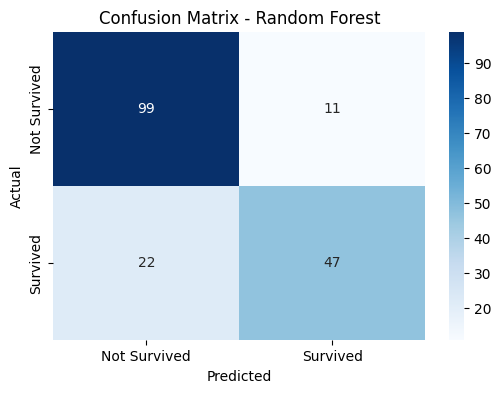

In [130]:
import seaborn as sns

cm_best = confusion_matrix(y_test, y_pred_best)
# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_best,cmap='Blues',annot=True, xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [112]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



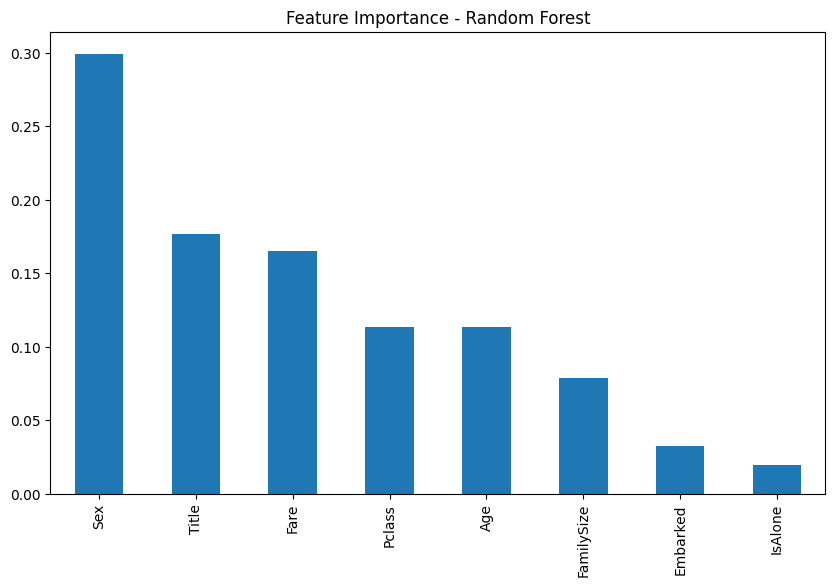

In [118]:
import matplotlib.pyplot as plt

# Get feature importances
importances = best_rf.feature_importances_
feature_names = x.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()


In [122]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, x, y, cv=5)
cv_scores.mean()


np.float64(0.8237838177138912)

**This is good as it is greater then the previous test accuracy.** We can move forward with this and everything is under control.

## 7. Streamlit Deployment

In [132]:
import joblib

# Save the trained model
joblib.dump(best_rf, 'random_forest_model_titanic.pkl')


['random_forest_model_titanic.pkl']

**Now this model will be deployed with the help of streamlit in deployment section.**

## 8. Summary

### ✅ **Model Report Summary**

- **Model Used:** Random Forest Classifier  
- **Objective:** Predict Titanic passenger survival based on socio-demographic and travel features.

#### 📊 **Key Features**
- **Numerical:** Age (scaled), Fare (scaled), FamilySize  
- **Categorical:** Sex (encoded), Pclass, Embarked, Title, IsAlone  

#### ⚙️ **Model Performance**
- **Accuracy:** ~81%  
- **Precision:** High on both classes  
- **Recall:** Balanced for survivors and non-survivors   
- **Cross-validation:** 5-fold CV used for reliability  
- **Hyperparameter Tuning:** Performed using `GridSearchCV`

#### 🧠 **Model Insights**
- Important features: Sex, Fare, Pclass, Title, Age  
- Feature scaling improved generalization  
- Balanced model with no severe overfitting

#### 🗃️ **Deployment**
- Model and scaler saved using `joblib`  
- Deployed with interactive input UI using **Streamlit**
